In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing Data Set 
df = pd.read_csv("export_2024-09-02T1153.csv")
df.head()

,bet_id,event_id,event_date,bet_type,odds,bet_amount,bet_outcome
0,1001,2001,1/1/2022,moneyline,1.5,100,win
1,1002,2001,1/1/2022,spread,2.2,150,loss
2,1003,2001,1/1/2022,over/under,1.8,50,win
3,1004,2002,1/2/2022,moneyline,2.0,75,win
4,1005,2002,1/2/2022,spread,1.9,125,win


In [3]:
# Event Date to datetime format

df['event_date'] = pd.to_datetime(df['event_date'])


In [4]:
# Defining win and loss indicators

df['win_flag'] = df['bet_outcome'].apply(lambda x: 1 if x == 'win' else 0)


In [5]:
# Calculation of the return from bets

df['bet_return'] = df.apply(lambda row: row['bet_amount'] * row['odds'] if row['bet_outcome'] == 'win' else -row['bet_amount'], axis=1)


In [6]:
# Total Number OF Bets

total_bets = df.shape[0]


In [7]:
# Overall win rate 

win_rate = df['win_flag'].mean()


In [8]:
# Total Profit/Loss (betting return)

total_return = df['bet_return'].sum()


In [9]:
# Distribution of Winning Ods

winning_bets = df[df['win_flag'] == 1]
winning_ods_distr = winning_bets['odds'].value_counts()


In [10]:
# Outputs

summary = {
    'Total Bets': total_bets,
    'Win Rate': win_rate,
    'Total Betting Return': total_return,
    'Wining Odds Distribution': winning_ods_distr
}

print(summary)

{'Total Bets': 12, 'Win Rate': 0.5833333333333334, 'Total Betting Return': 716.5, 'Wining Odds Distribution': 1.9    2
1.5    1
1.8    1
2.0    1
2.4    1
2.2    1
Name: odds, dtype: int64}


In [11]:
# Profit / Loss for each bet

df['profit_loss'] = df.apply(lambda row: (row['bet_amount'] * (row['odds']-1)) if row['bet_outcome'] == 'win' else -row['bet_amount'], axis=1)


In [12]:
# Total Profit/Loss
total_profit_ls = df['profit_loss'].sum()

In [13]:
# Total winning odds

ods_of_win = df[df['bet_outcome'] == 'win']['odds'].sum()


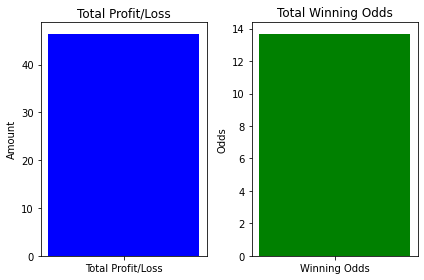

In [14]:
# Plotting

plt.subplot(1, 2, 1)
plt.bar(['Total Profit/Loss'], [total_profit_ls], color='blue')
plt.ylabel('Amount')
plt.title('Total Profit/Loss')
plt.subplot(1, 2, 2)
plt.bar(['Winning Odds'], [ods_of_win], color='green')
plt.ylabel('Odds')
plt.title('Total Winning Odds')
plt.tight_layout()
plt.show()

In [15]:
# Individual Profits
df_individual_profits = df[['bet_id', 'bet_amount', 'odds', 'bet_outcome', 'profit_loss']]

In [16]:
print(df_individual_profits)

    bet_id  bet_amount  odds bet_outcome  profit_loss
0     1001         100   1.5         win         50.0
1     1002         150   2.2        loss       -150.0
2     1003          50   1.8         win         40.0
3     1004          75   2.0         win         75.0
4     1005         125   1.9         win        112.5
5     1006          80   2.1        loss        -80.0
6     1007         200   1.6        loss       -200.0
7     1008         100   2.4         win        140.0
8     1009          60   1.7        loss        -60.0
9     1010         150   1.9         win        135.0
10    1011         100   2.0        loss       -100.0
11    1012          70   2.2         win         84.0


In [17]:
# Task 8 Advance Analytics  - Financial Analysis

In [18]:
# Calculate the Profit
df['Profit'] = df.apply(lambda row: row['bet_amount'] * (row['odds'] - 1) if row['bet_outcome'] == 'win' else -row['bet_amount'], axis=1 )

In [19]:
# Overall Profit/Loss Calculation
total_profit = df['Profit'].sum()
print(f"Total Profit / Loss: {total_profit}")

Total Profit / Loss: 46.5


In [20]:
# Profit/Loss by Bet Type 

profit_type = df.groupby('bet_type')['Profit'].sum()
print("Profit/Loss by Bet Type")
print(profit_type)

Profit/Loss by Bet Type
bet_type
moneyline     60.0
over/under   -16.0
spread         2.5
Name: Profit, dtype: float64


In [23]:
# Profit/Loss By Event Date
profit_date = df.groupby('event_date')['Profit'].sum()
print("Profit/Loss By Event Date")
print(profit_date)

Profit/Loss By Event Date
event_date
2022-01-01    -60.0
2022-01-02    107.5
2022-01-03   -120.0
2022-01-04    119.0
Name: Profit, dtype: float64


In [26]:
# Return On Investment 
total_investment = df['bet_amount'].sum()
roi = (total_profit / total_investment) * 100
print(f"ROI: {roi:.2}%")


ROI: 3.7%


In [28]:
# Statistical (Inspiration By Betson Hackathon in Malta)

In [29]:
# Betting Patterns And Trends

bets_by_date = df.groupby("event_date").size()
print("Bettng Volume by Event Date:")
print(bets_by_date)

Bettng Volume by Event Date:
event_date
2022-01-01    3
2022-01-02    3
2022-01-03    3
2022-01-04    3
dtype: int64


In [30]:
# Average Bet Amount by Bet Type

avg_bet_am = df.groupby('bet_type')['bet_amount'].mean()
print("Average Bet Amount By Bet Type")
print(avg_bet_am)


Average Bet Amount By Bet Type
bet_type
moneyline     131.25
over/under     65.00
spread        118.75
Name: bet_amount, dtype: float64


In [31]:
# Bet Distribution

outcome_distr = df['bet_outcome'].value_counts()
print("Bet outcome Distribution:")
print(outcome_distr)


Bet outcome Distribution:
win     7
loss    5
Name: bet_outcome, dtype: int64


In [35]:
# Average Odds of Wins vs Loss

avg_odds_win = df[df['bet_outcome'] == 'win']['odds'].mean()
avg_odds_lose = df[df['bet_outcome'] == 'loss']['odds'].mean()

print(f"\nAverage Odds of Wins: {avg_odds_win:.2f}")
print(f"Average Odds of Losses: {avg_odds_lose:.2f}")



Average Odds of Wins: 1.96
Average Odds of Losses: 1.92


In [38]:
# Impact of Odds on Profitability

df['odds_range'] = pd.cut(df['odds'], bins=[1.0, 1.5, 2.0, 2.5, 3.0], labels=['1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0'])
profit_odds = df.groupby('odds_range')['Profit'].sum()
print("Profit By Odds Range:")
print(profit_odds)


Profit By Odds Range:
odds_range
1.0-1.5    50.0
1.5-2.0     2.5
2.0-2.5    -6.0
2.5-3.0     0.0
Name: Profit, dtype: float64


In [39]:
# Risk Analysis

bet_outcome = df.groupby('bet_outcome')['bet_amount'].mean()
print("\nAverage Bet Amount by Outcome:")
print(bet_outcome)




Average Bet Amount by Outcome:
bet_outcome
loss    118.000000
win      95.714286
Name: bet_amount, dtype: float64


In [41]:
# Variance In Bet Outcomes
var_out = df.groupby('bet_outcome')['Profit'].var()
print("\nVariance in Bet Outcomes:")
print(var_out)


Variance in Bet Outcomes:
bet_outcome
loss    3220.000000
win     1564.369048
Name: Profit, dtype: float64


In [44]:
# Optimization and Strategy Insights
optimal_bet = profit_type.sort_values(ascending=False)
print("\nOptimal Bet Types by Profit:")
print(optimal_bet_types)


Optimal Bet Types by Profit:
bet_type
moneyline     60.0
spread         2.5
over/under   -16.0
Name: Profit, dtype: float64


In [45]:
#Recommendation System - Basic Strategy Insight
recommended = optimal_bet.idxmax()
print(f"\nRecommended Bet Type Based on Historical Success: {recommended}")


Recommended Bet Type Based on Historical Success: moneyline
